In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score

In [31]:
data=pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [32]:
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [33]:
data.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [34]:
data.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [35]:
data["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [36]:
for i in list(data.columns):
    print("{}--{}".format(i,data[i].value_counts().shape[0]))

age--41
sex--2
cp--4
trtbps--49
chol--152
fbs--2
restecg--3
thalachh--91
exng--2
oldpeak--40
slp--3
caa--5
thall--4
output--2


In [37]:
kategorik=["sex","cp","fbs","restecg","exng","slp","caa","thall","output"]

In [38]:
data_kat=data.loc[:,kategorik]

In [39]:
data_kat

,sex,cp,fbs,restecg,exng,slp,caa,thall,output
0,1,3,1,0,0,0,0,1,1
1,1,2,0,1,0,0,0,2,1
2,0,1,0,0,0,2,0,2,1
3,1,1,0,1,0,2,0,2,1
4,0,0,0,1,1,2,0,2,1
...,...,...,...,...,...,...,...,...,...
298,0,0,0,1,1,1,0,3,0
299,1,3,0,1,0,1,0,3,0
300,1,0,1,1,0,1,2,3,0
301,1,0,0,1,1,1,1,3,0


AttributeError: 'numpy.int64' object has no attribute 'startswith'

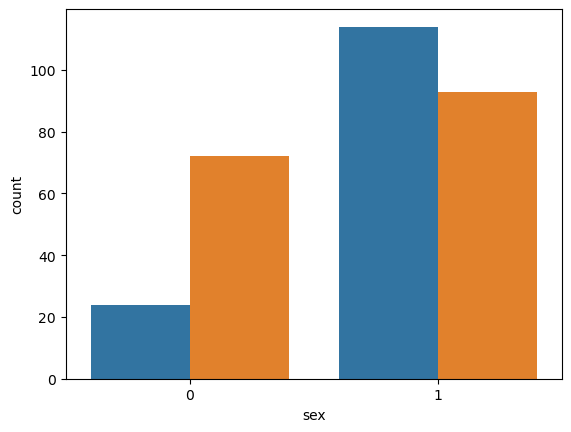

In [40]:
for i in data_kat:
    plt.figure()
    sns.countplot(x=i,data=data_kat,hue="output")
    plt.title(i)

In [ ]:
sayisal=["age","trtbps","chol","thalachh","oldpeak","output"]

In [ ]:
data_sayisal=data.loc[:,sayisal]

In [ ]:
data_sayisal.head()

In [ ]:
sns.pairplot(data_sayisal,hue="output",diag_kind="kde")
plt.show()

In [ ]:
scaler=StandardScaler()

In [ ]:
scaled_array=scaler.fit_transform(data[sayisal[:-1]])

In [ ]:
scaled_array

In [49]:
data1=data.copy()

In [50]:
data1=pd.get_dummies(data1,columns=kategorik[:-1],drop_first=True)

In [51]:
data1

,age,trtbps,chol,thalachh,oldpeak,output,sex_1,cp_1,cp_2,cp_3,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,1,True,False,False,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,1,True,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,1,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,1,True,True,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,1,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,0,True,False,False,True,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,0,True,False,False,False,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,0,True,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [53]:
x=data1.drop(["output"],axis=1)
y=data1[["output"]]

In [54]:
x

,age,trtbps,chol,thalachh,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exng_1,slp_1,slp_2,caa_1,caa_2,caa_3,caa_4,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,True,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
1,37,130,250,187,3.5,True,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2,41,130,204,172,1.4,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,56,120,236,178,0.8,True,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,57,120,354,163,0.6,False,False,False,False,False,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,True
299,45,110,264,132,1.2,True,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
300,68,144,193,141,3.4,True,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
301,57,130,131,115,1.2,True,False,False,False,False,...,True,True,False,True,False,False,False,False,False,True


In [55]:
y

,output
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


In [56]:
scaler=StandardScaler()

In [57]:
scaled_array=scaler.fit_transform(data[sayisal[:-1]])

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.15,random_state=5)

In [61]:
logreg=LogisticRegression()

In [62]:
logreg.fit(xtrain,ytrain)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
ypred_prob=logreg.predict_proba(xtest)
ypred_prob

array([[0.11151215, 0.88848785],
       [0.99467794, 0.00532206],
       [0.98284358, 0.01715642],
       [0.86660325, 0.13339675],
       [0.64506429, 0.35493571],
       [0.96248402, 0.03751598],
       [0.3071092 , 0.6928908 ],
       [0.98343413, 0.01656587],
       [0.04237913, 0.95762087],
       [0.03160835, 0.96839165],
       [0.21461254, 0.78538746],
       [0.99016625, 0.00983375],
       [0.07231503, 0.92768497],
       [0.05032931, 0.94967069],
       [0.6642149 , 0.3357851 ],
       [0.60724672, 0.39275328],
       [0.69261235, 0.30738765],
       [0.17363189, 0.82636811],
       [0.04378954, 0.95621046],
       [0.95262499, 0.04737501],
       [0.96947124, 0.03052876],
       [0.91957339, 0.08042661],
       [0.08689529, 0.91310471],
       [0.95761535, 0.04238465],
       [0.80124119, 0.19875881],
       [0.07514689, 0.92485311],
       [0.27374232, 0.72625768],
       [0.0297732 , 0.9702268 ],
       [0.11242168, 0.88757832],
       [0.97590874, 0.02409126],
       [0.

In [65]:
ypred=np.argmax(ypred_prob,axis=1)
ypred

array([1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0], dtype=int64)

In [66]:
dummy=pd.DataFrame(ypred_prob)
dummy["ypred"]=ypred
dummy.head()

,0,1,ypred
0,0.111512,0.888488,1
1,0.994678,0.005322,0
2,0.982844,0.017156,0
3,0.866603,0.133397,0
4,0.645064,0.354936,0


In [67]:
print("Test Accuracy",accuracy_score(ypred,ytest))

Test Accuracy 0.8478260869565217
